In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import binom
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind
from pandas.plotting import scatter_matrix
import scipy.stats as st
import statistics as stats

In [2]:
df2 = pd.read_csv("DF1_EDA.csv")

In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   Department                1470 non-null   object 
 4   DistanceFromHome          1470 non-null   float64
 5   Education                 1470 non-null   float64
 6   EducationField            1470 non-null   object 
 7   EnvironmentSatisfaction   1470 non-null   float64
 8   Gender                    1470 non-null   object 
 9   JobInvolvement            1470 non-null   float64
 10  JobLevel                  1470 non-null   float64
 11  JobRole                   1470 non-null   object 
 12  JobSatisfaction           1470 non-null   float64
 13  MaritalStatus             1470 non-null   object 
 14  MonthlyI

# Probability assessment- factors influencing attrition


#Descriptive Statistics
#Talk about boxplots and central tendencies of the data- from EDA section and Class 2 of Stats


# Relative Frequency

In [4]:
# Calculate the value counts of 'Attrition' in 'df2'
attrition_counts = df2['Attrition'].value_counts()

# Calculate the relative frequencies
relative_frequencies = attrition_counts / len(df2)

# Create a subtable
subtable = pd.DataFrame({
    'Attrition Status': attrition_counts.index,
    'Frequency': attrition_counts.values,
    'Relative Frequency': relative_frequencies.values
})

# Display the subtable
print(subtable)


  Attrition Status  Frequency  Relative Frequency
0               No       1212             0.82449
1              Yes        258             0.17551


# Correlation Matrix

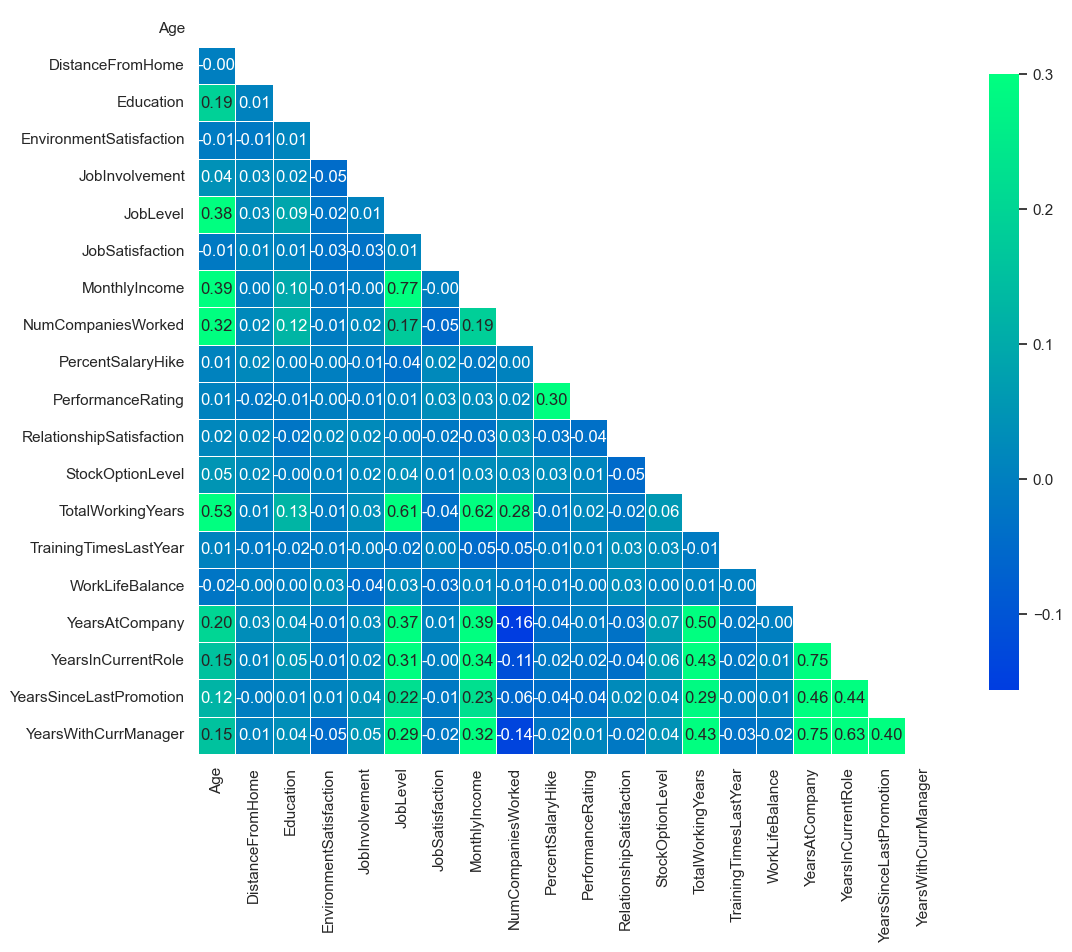

In [5]:
#EDA Multivariate Analysis
#creating a correlation matrix to visualise the connection between features

corr = df2.corr(method = "spearman")
sns.set(style="white")

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 10), dpi = 100)
sns.heatmap(corr, mask = mask, cmap= "winter", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8}, annot = True, fmt = ".2f")
plt.show()

# Scatterplot

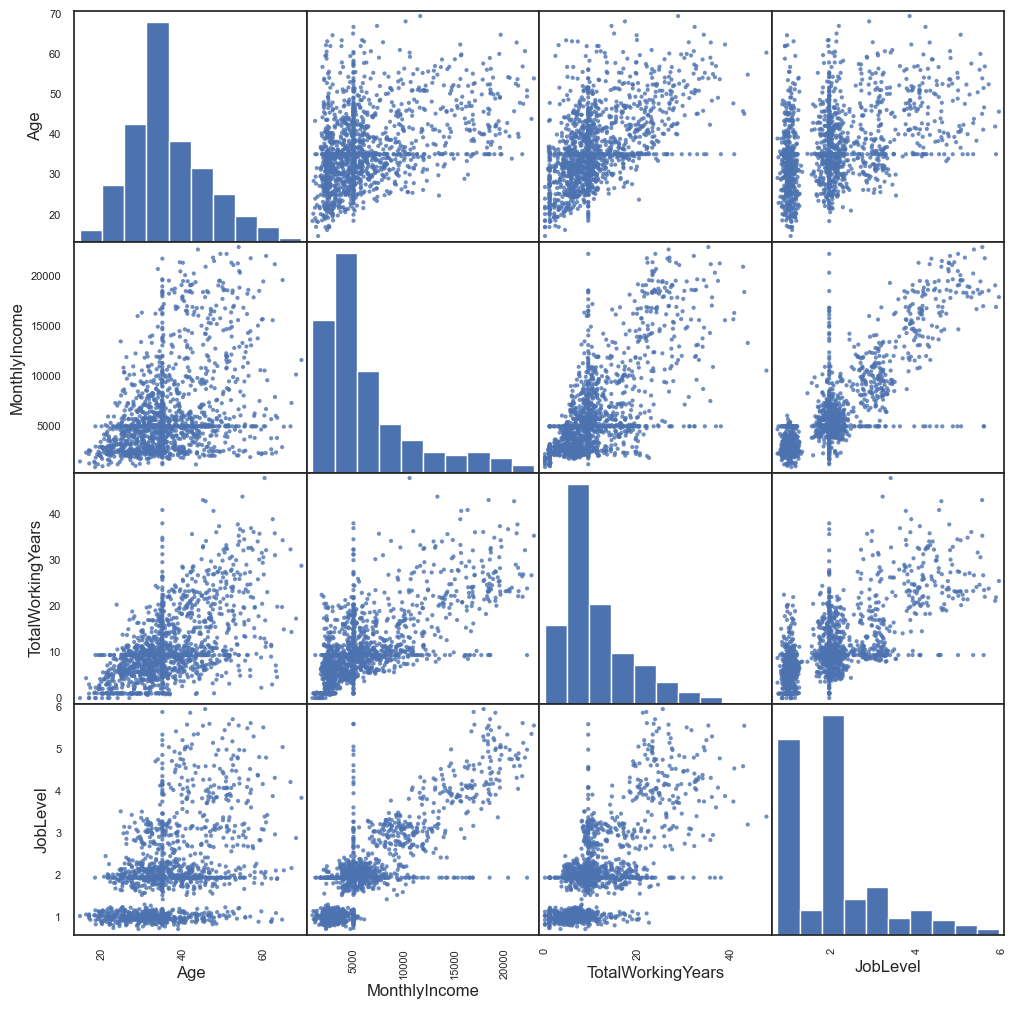

In [6]:

selected_columns = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'JobLevel']
selected_data = df2[selected_columns]

# Create a scatterplot matrix
scatter_matrix(selected_data, alpha=0.8, figsize=(12, 12), diagonal='hist')

# Show the plot
plt.show()


In [7]:
#Analyse the results above

In [8]:
#Hypothesis:
#There are strong correlations between TotalWorkingYears and MonthlyIncome, and Age/TotalWorkingYears, and Age/MonthlyIncome
#Do older workers leave at a higher rate than younger ones?

# Boxplot and T-Tests on Attrition by Age

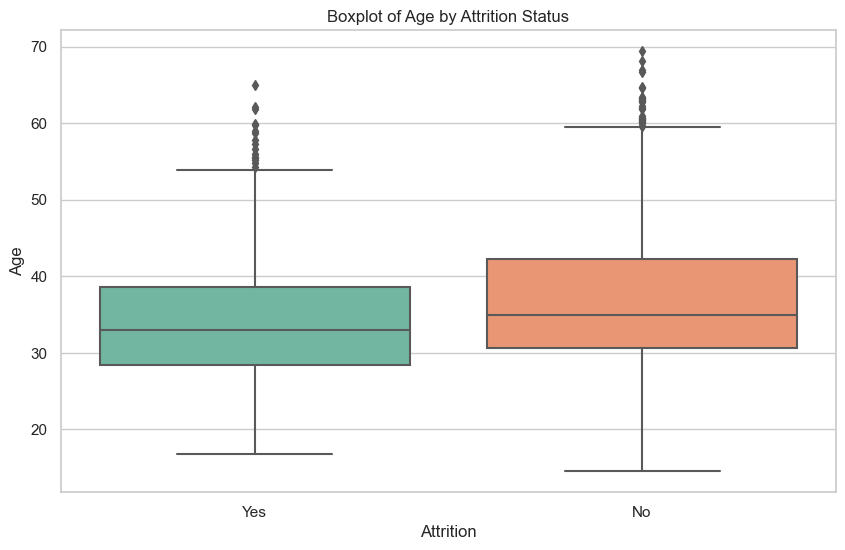

In [9]:
# Create a boxplot 
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='Age', data=df2, palette='Set2')
plt.title('Boxplot of Age by Attrition Status')
plt.show()


In [10]:
# Descriptive statistics
print(df2.groupby('Attrition')['Age'].describe())

            count       mean       std        min        25%        50%  \
Attrition                                                                 
No         1212.0  36.853325  9.262683  14.544608  30.700259  34.951950   
Yes         258.0  34.651812  9.772926  16.840129  28.375773  33.057296   

                 75%        max  
Attrition                        
No         42.251654  69.402515  
Yes        38.647652  65.043722  


In [11]:
# Separate the data into two groups: Attrited and Stayed
attrited_data = df2[df2['Attrition'] == 'Yes']
stayed_data = df2[df2['Attrition'] == 'No']

# Perform an independent two-sample t-test
t_stat, p_value = ttest_ind(df2['Age'], stayed_data['Age'])

# Interpret the results
if p_value < 0.5:
    print("Reject the null hypothesis: There is a significant difference in Age.")
else:
    print("Fail to reject the null hypothesis: No significant difference in Age.")


Reject the null hypothesis: There is a significant difference in Age.


# Attrition by Monthly Income

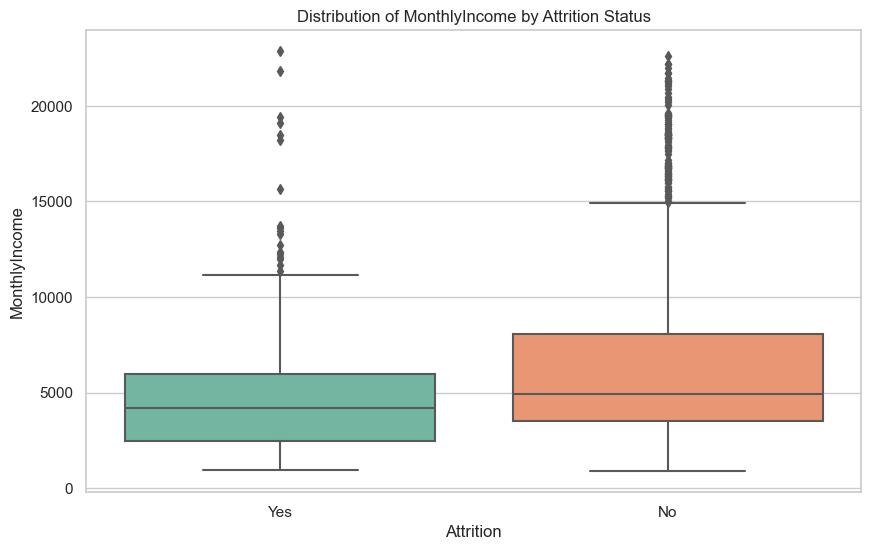

In [12]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df2, palette='Set2')
plt.title('Distribution of MonthlyIncome by Attrition Status')
plt.show()


# T-Tests

In [13]:
# Descriptive statistics
print(df2.groupby('Attrition')['MonthlyIncome'].describe())

            count         mean          std         min          25%  \
Attrition                                                              
No         1212.0  6656.372316  4658.401672  891.481007  3498.427642   
Yes         258.0  5115.614562  3734.981461  974.659192  2467.614020   

                   50%          75%           max  
Attrition                                          
No         4957.070475  8077.134563  22615.197479  
Yes        4211.200613  5971.124096  22858.020388  


In [14]:
# Separate the data into two groups: Attrited and Stayed
attrited_data = df2[df2['Attrition'] == 'Yes']
stayed_data = df2[df2['Attrition'] == 'No']

# Perform an independent two-sample t-test
t_stat, p_value = ttest_ind(df2['MonthlyIncome'], stayed_data['MonthlyIncome'])

# Interpret the results
if p_value < 0.5:
    print("Reject the null hypothesis: There is a significant difference in monthly income.")
else:
    print("Fail to reject the null hypothesis: No significant difference in monthly income.")


Reject the null hypothesis: There is a significant difference in monthly income.


# Overall probability of success

In [15]:
#Overall probability of success

overall_prob_attrition = df2['Attrition'].value_counts(normalize=True)['Yes']
print(f"Overall probability of Attrition: {overall_prob_attrition:.2%}")


Overall probability of Attrition: 17.55%


# Z-scores

In [16]:
# Calculate Z-scores for the 'Age' column
df2['Age_Zscore'] = (df2['Age'] - df2['Age'].mean()) / df2['Age'].std()

# Display the first few rows of the dataset with Z-scores
print(df2[['Age', 'Age_Zscore']].head())


         Age  Age_Zscore
0  41.920786    0.580921
1  51.589037    1.610741
2  33.131540   -0.355272
3  34.707073   -0.187453
4  24.790188   -1.243757


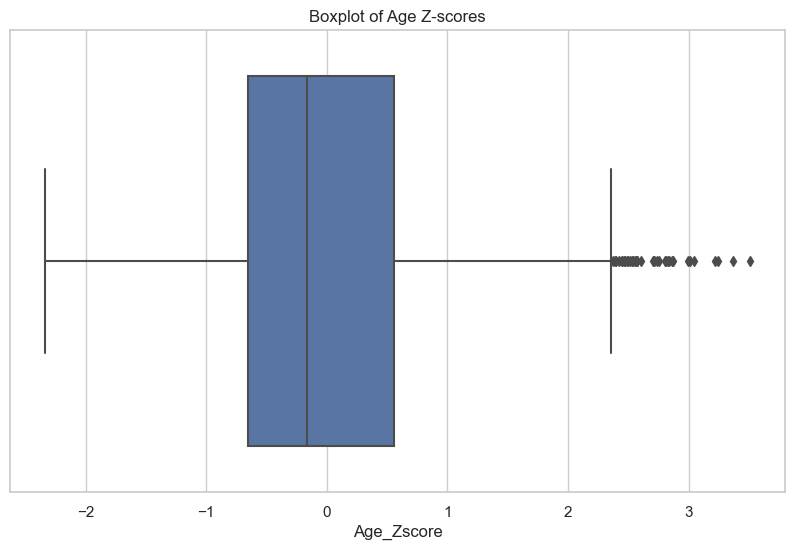

In [17]:
# Visualize Z-scores using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Zscore', data=df2)
plt.title('Boxplot of Age Z-scores')
plt.show()


# Confidence Intervals

In [18]:
#We want to know the average age where attrition is yes.

In [19]:
#We define the variable --> X = age 
column_name = 'Age'
X = df2[df2['Attrition'] == 'Yes'][[column_name]].values

mean = X.mean()
#We create the confidence interval at 90% confidence for the average age where attrition is yes.

st.t.interval(alpha = 0.90, df = len(X)-1, loc = np.mean(X), scale = st.sem(X))


(array([33.64740336]), array([35.65622022]))

In [20]:
age_statistics = df2['Age'].describe()

print(age_statistics)


count    1470.000000
mean       36.466937
std         9.388288
min        14.544608
25%        30.357410
50%        34.951950
75%        41.714666
max        69.402515
Name: Age, dtype: float64


In [21]:
#Lower limit

LL = 36.466937 - (1.65 * 9.388288/(123**0.5))
LL

35.07018985516642

In [22]:
#Upper limit

UL = 36.466937 + (1.65 * 9.388288/(123**0.5))
UL

37.863684144833584

In [23]:
#Now we will perform the CI assuming Normal distribution

from scipy import stats

In [24]:
stats.norm.interval(0.90,loc = np.mean(X),scale = st.sem(X))

(array([33.65102393]), array([35.65259965]))

In [25]:
#Now, we want to analyse the average age where attrition is yes at 95% confidence

In [27]:
confidence_interval_95 = st.t.interval(alpha=0.95, df=len(X)-1, loc=np.mean(X), scale=st.sem(X))
confidence_interval_95

(array([33.45365716]), array([35.84996642]))

In [28]:
confidence_interval_99 = st.t.interval(alpha=0.99, df=len(X)-1, loc=np.mean(X), scale=st.sem(X))
confidence_interval_99

(array([33.07286346]), array([36.23076012]))

# ANOVA-One Way

<Figure size 640x480 with 0 Axes>

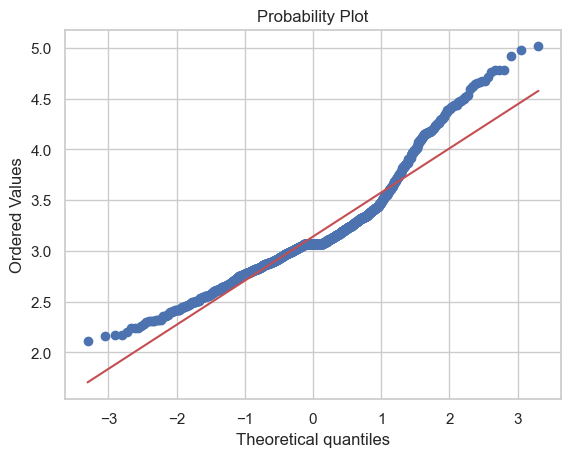

<Figure size 640x480 with 0 Axes>

In [36]:
#We check normality with QQ-plot
from scipy import stats

stats.probplot(df2.PerformanceRating, plot = plt)
plt.figure()

In [37]:
stats.shapiro(df2.PerformanceRating[df2.Department =="Human Resources"])

ShapiroResult(statistic=0.948143720626831, pvalue=0.0004115627962164581)

In [38]:
#H0: data comes from normal distribution
#H1: data does not come from normal distribution
#We use alpha (significance level 5%)
As p-value is less than 0.05(alpha), then we accept H1, then data does not come from normal distribution

In [39]:
stats.shapiro(df2.PerformanceRating[df2.Department =="Research & Development"])

ShapiroResult(statistic=0.9097204804420471, pvalue=1.521717577108944e-23)

In [ ]:
#As p-value is greater than alpha, then we accept H0, then data comes from normal distribution

In [40]:
stats.shapiro(df2.PerformanceRating[df2.Department =="Sales"])

ShapiroResult(statistic=0.9269786477088928, pvalue=6.375994567389687e-13)

In [ ]:
#As p-value is greater than alpha, then we accept H0, then data comes from normal distribution

In [43]:
#Step 3: We check equality of the variances
HumanResources = df2.PerformanceRating[df2.Department =="Human Resources"]
ResearchDevelopment = df2.PerformanceRating[df2.Department =="Research & Development"]
Sales = df2.PerformanceRating[df2.Department =="Sales"]

In [45]:
#We perform Levene test to check equality of the variances

#H0: the variances are equal between the Departments
#H1: the variances are not equal between the Departments

from scipy.stats import levene

levene(HumanResources, ResearchDevelopment, Sales, center = 'mean')

LeveneResult(statistic=1.326312241907514, pvalue=0.26577250811604886)

In [ ]:
#As p-value is greater than alpha, the we accept H0, and then we can assume equality of the variances

In [46]:
#Now we checked all the conditions, and we can move on with ANOVA

#H0 : mu PerformanceRating HumanResources = mu PerformanceRating ResearchDevelopment = mu PerformanceRating Sales
#H1: there is at least one of these mu that is different to the others

from statsmodels.formula.api import ols
import statsmodels.api as sm

model = ols('PerformanceRating~Department', data = df2).fit()
aov = sm.stats.anova_lm(model, type = 2)
print(aov)

                df     sum_sq   mean_sq         F    PR(>F)
Department     2.0    0.69927  0.349635  1.710746  0.181091
Residual    1467.0  299.81923  0.204376       NaN       NaN


In [48]:
#Result = we checked the p-value and this is 0.18, which is greater than 0.05 (alpha). As p-value is greater then we accept H0
#In summary, the ANOVA results suggest that there is no significant difference in the means of the 'Department' variable

In [49]:
import os
import pandas as pd

# Specify the directory path
directory_path = 'OneDrive/Documents/Github/Integrated_CA2/Integrated-CA2/'
os.makedirs(directory_path, exist_ok=True)
df2.to_csv(os.path.join(directory_path, 'DF2_STATS.csv'), index=False)